In [2]:
import pandas as pd
import requests

In [14]:
gov_trust_df = pd.read_csv('gov_trust.csv')
current_combined_df = pd.read_csv('combined_present.csv')
current_combined_df.rename(columns={"event_date": "year"}, inplace=True)
combined_data = pd.merge(current_combined_df, gov_trust_df, on=['country', 'year'])
combined_data

,year,country,counts,population,events_per_capita,gdp_per_capita,public_trust_percentage
0,2021,Australia,681,25685412,2.651310,60697.245436,51.9
1,2022,Australia,794,26005540,3.053196,65099.845912,49.9
2,2020,Belgium,784,11538604,6.794583,45609.003494,29.5
3,2021,Belgium,833,11586195,7.189591,51850.397184,47.3
4,2022,Belgium,523,11685814,4.475512,49926.825430,57.2
5,2020,France,5165,67571107,7.643800,39179.744260,41.0
6,2021,France,8356,67764304,12.330976,43671.308410,43.4
7,2022,France,6421,67971311,9.446633,40886.253268,43.4
8,2020,Germany,4292,83160871,5.161081,46749.476228,65.4
9,2021,Germany,4215,83196078,5.066345,51426.750365,60.5


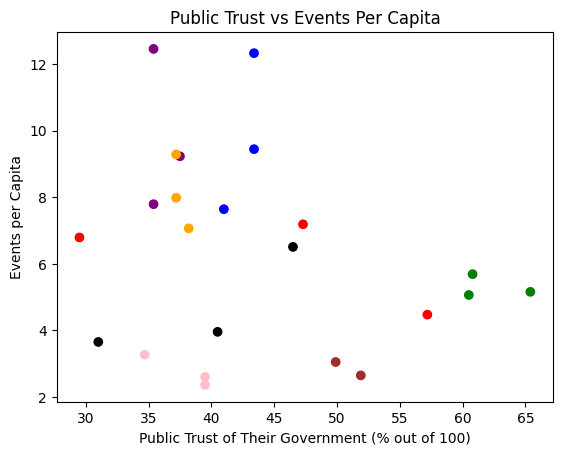

In [6]:
# creates a scatter plot of the number of events per capita and the gdp per capita
# each point should represent a country in a given year, and different countries should be different colors
import matplotlib.pyplot as plt

colors = {
    'Belgium': 'red',
    'France': 'blue',
    'Germany': 'green',
    'Italy': 'purple',
    'Spain': 'orange',
    'United States': 'black',
    'United Kingdom': 'pink',
    'Australia': 'brown'
}
# perhaps make a legend, colors wont be enough without labels
plt.scatter(combined_data['public_trust_percentage'], combined_data['events_per_capita'], c=combined_data['country'].apply(lambda x: colors[x]))
plt.xlabel('Public Trust of Their Government (% out of 100)')
plt.ylabel('Events per Capita')
plt.title('Public Trust vs Events Per Capita')
# plt.legend(title="Country")
plt.show()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0           Australia
1             Austria
2             Belgium
3              Brazil
4              Canada
            ...      
692            Sweden
693       Switzerland
694           Türkiye
695    United Kingdom
696     United States
Name: country, Length: 697, dtype: object

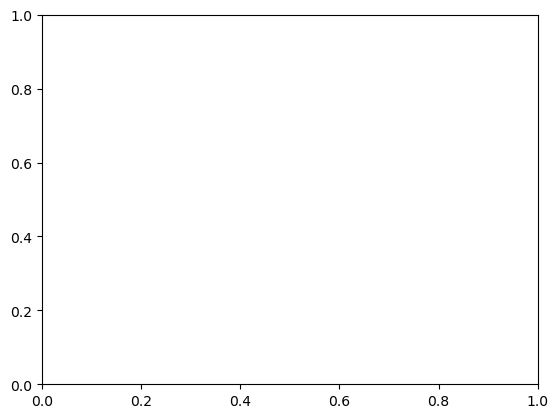

In [22]:
colors = {
    'Belgium': 'red',
    'France': 'blue',
    'Germany': 'green',
    'Italy': 'purple',
    'Spain': 'orange',
    'United States': 'black',
    'United Kingdom': 'pink',
    'Australia': 'brown',
    "Austria": 'mediumturquoise', 
    "Brazil": 'magenta', 
    "Canada": 'salmon', 
    "Chile": 'violet', 
    "Colombia": 'chocolate', 
    "Costa Rica": 'chocolate', 
    "Czechia": , 
    "Denmark": , 
    "Estonia": , 
    "Finland": ,
    "Greece": , 
    "Hungary": , 
    "Iceland": , 
    "Ireland": , 
    "Israel": , 
    "Japan": , 
    "Korea": , 
    "Latvia": , 
    "Lithuania": , 
    "Luxembourg": ,
    "Mexico": , 
    "Netherlands": , 
    "New Zealand": , 
    "Norway": ,
    "Poland": , 
    "Portugal": , 
    "Russia": , 
    "Slovak Republic": , 
    "Slovenia": , 
    "South Africa": , 
    "Sweden": , 
    "Switzerland": , 
    "Türkiye": 
}
plt.scatter(gov_trust_df['year'], gov_trust_df['public_trust_percentage'], c=gov_trust_df['country'].apply(lambda x: colors[x]))
plt.xlabel('Public Trust of Their Government (% out of 100)')
plt.ylabel('Year')
plt.title('Public Trust vs Year')
plt.show()

In [6]:
def get_world_bank_data(indicator):
    countrycodes = 'BE;FR;DE;IT;ES;US;GB;AU'
    url = f'http://api.worldbank.org/v2/country/{countrycodes}/indicator/{indicator}?date=2012:2022&format=json'
    data = requests.get(url).json()
    
    # cleans up the data and creates a dataframe
    df = pd.DataFrame(data[1])
    df = df.drop(columns=['indicator', 'countryiso3code', 'unit', 'obs_status', 'decimal'])
    df['country'] = df['country'].apply(lambda x: x['value'])
    df = df.rename(columns={'date': 'year'})
    df['year'] = df['year'].astype(str)

    return df

In [10]:
# percentage of the population living on less than $2.15 
poverty_df = get_world_bank_data('NY.GDP.PCAP.CD')
poverty_df

,country,year,value
0,Australia,2022,65099.845912
1,Australia,2021,60697.245436
2,Australia,2020,51868.247557
3,Australia,2019,55049.571920
4,Australia,2018,57273.520475
5,Australia,2017,53954.553495
6,Australia,2016,49918.793933
7,Australia,2015,56758.869203
8,Australia,2014,62558.243879
9,Australia,2013,68198.419345


In [9]:
poverty_df = get_world_bank_data('SI.POV.NAHC')
poverty_df

,country,year,value
0,Australia,2022,NaN
1,Australia,2021,NaN
2,Australia,2020,NaN
3,Australia,2019,NaN
4,Australia,2018,NaN
5,Australia,2017,NaN
6,Australia,2016,NaN
7,Australia,2015,NaN
8,Australia,2014,NaN
9,Australia,2013,NaN


In [5]:
api_key = '4c3b9487-d25c-4fef-af63-1d6593eadc4a'
dataset_doi = 'doi:10.7910/DVN/HTTWYL'
metadata_url = f'https://dataverse.harvard.edu/api/datasets/:persistentId'
params = {
    'persistentId': dataset_doi
}
headers = {
    'X-Dataverse-key': api_key
}
response = requests.get(metadata_url, headers=headers, params=params)
print(response.json())

{'status': 'OK', 'data': {'id': 2775555, 'identifier': 'DVN/HTTWYL', 'persistentUrl': 'https://doi.org/10.7910/DVN/HTTWYL', 'protocol': 'doi', 'authority': '10.7910', 'publisher': 'Harvard Dataverse', 'publicationDate': '2016-01-13', 'storageIdentifier': 's3://10.7910/DVN/HTTWYL', 'latestVersion': {'id': 334304, 'datasetId': 2775555, 'datasetPersistentId': 'doi:10.7910/DVN/HTTWYL', 'storageIdentifier': 's3://10.7910/DVN/HTTWYL', 'versionNumber': 5, 'versionMinorNumber': 1, 'versionState': 'RELEASED', 'UNF': 'UNF:6:F/k8KUqKpCa5UssBbL/gzg==', 'lastUpdateTime': '2022-10-10T14:49:06Z', 'releaseTime': '2022-10-10T14:49:06Z', 'createTime': '2022-10-10T14:48:40Z', 'publicationDate': '2016-01-13', 'citationDate': '2016-01-13', 'license': {'name': 'CC0 1.0', 'uri': 'http://creativecommons.org/publicdomain/zero/1.0', 'iconUri': 'https://licensebuttons.net/p/zero/1.0/88x31.png'}, 'fileAccessRequest': False, 'metadataBlocks': {'citation': {'displayName': 'Citation Metadata', 'name': 'citation', 'f